# Naive Bayes

Training Accuracy: 1.0


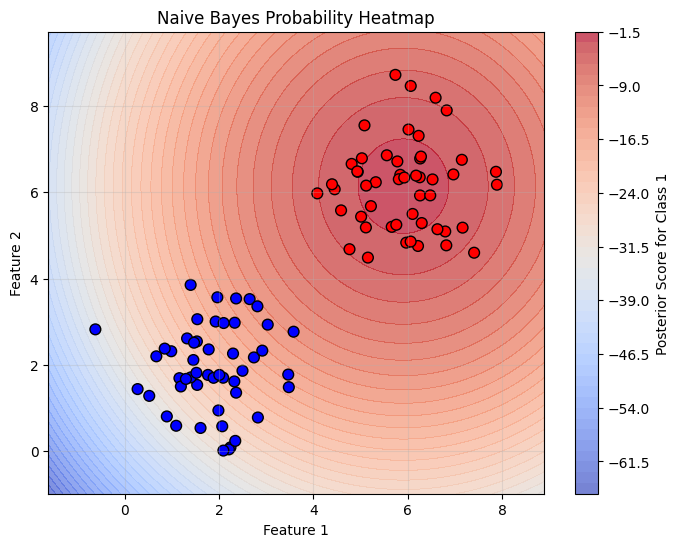

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# 1) Generate a simple dataset (2 classes, 2 features)

np.random.seed(42)

# Class 0: centered near (2, 2)
class0 = np.random.randn(50, 2) + np.array([2, 2])

# Class 1: centered near (6, 6)
class1 = np.random.randn(50, 2) + np.array([6, 6])

X = np.vstack([class0, class1])
y = np.array([0]*50 + [1]*50)


# 2) Gaussian Naive Bayes Implementation

class NaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.mean = {}
        self.var = {}
        self.priors = {}

        for c in self.classes:
            X_c = X[y == c]
            self.mean[c] = np.mean(X_c, axis=0)
            self.var[c] = np.var(X_c, axis=0) + 1e-6  # avoid division by zero
            self.priors[c] = X_c.shape[0] / X.shape[0]

    def gaussian(self, x, mean, var):
        numerator = np.exp(-(x - mean)**2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

    def predict_point(self, x):
        posteriors = []

        for c in self.classes:
            prior = np.log(self.priors[c])
            likelihood = np.sum(np.log(self.gaussian(x, self.mean[c], self.var[c])))
            posterior = prior + likelihood
            posteriors.append(posterior)

        return self.classes[np.argmax(posteriors)]

    def predict(self, X):
        return np.array([self.predict_point(x) for x in X])


# 3) Train the model

model = NaiveBayes()
model.fit(X, y)

# Predict training accuracy
y_pred = model.predict(X)
accuracy = (y_pred == y).mean()
print("Training Accuracy:", accuracy)


# 4) Visualization: Probability Heatmap

# Create a grid of points
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

grid_points = np.c_[xx.ravel(), yy.ravel()]

# Compute probability for class 1 only (for visualization)
Z = []
for point in grid_points:
    # compute class 1 posterior (not normalized)
    mean = model.mean[1]
    var = model.var[1]
    prior = np.log(model.priors[1])
    likelihood = np.sum(np.log(model.gaussian(point, mean, var)))
    posterior = prior + likelihood
    Z.append(posterior)

Z = np.array(Z).reshape(xx.shape)

# Plot heatmap
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, 50, cmap="coolwarm", alpha=0.7)
plt.colorbar(label="Posterior Score for Class 1")

# Plot points
plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k', cmap="bwr", s=60)
plt.title("Naive Bayes Probability Heatmap")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(alpha=0.3)
plt.show()